In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [4]:
# Create a sample time series data
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.random.randn(len(date_range))  # Random data for demonstration
ts = pd.Series(data, index=date_range)



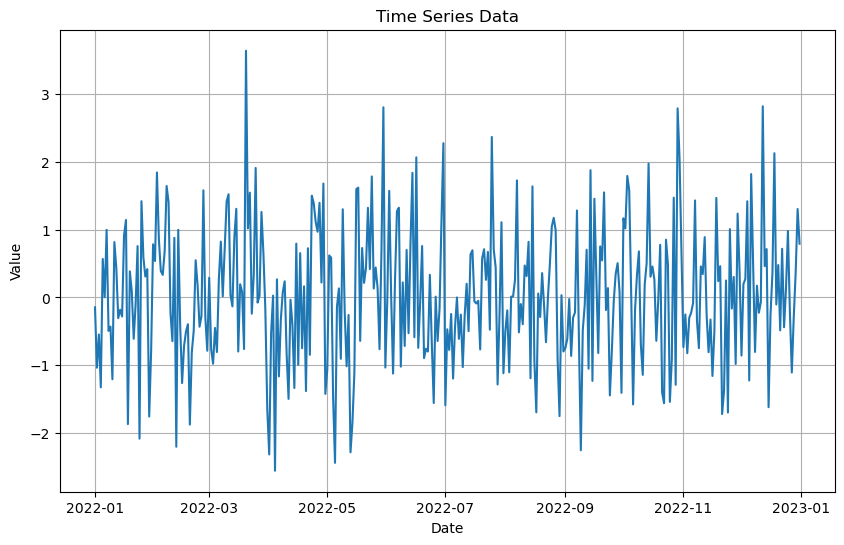

In [5]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()



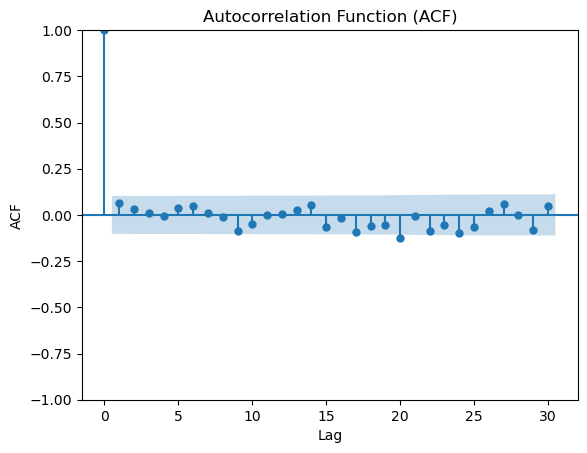

In [6]:
# Plot ACF and PACF to determine AR and MA orders
plot_acf(ts, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()



C:\Users\soham\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


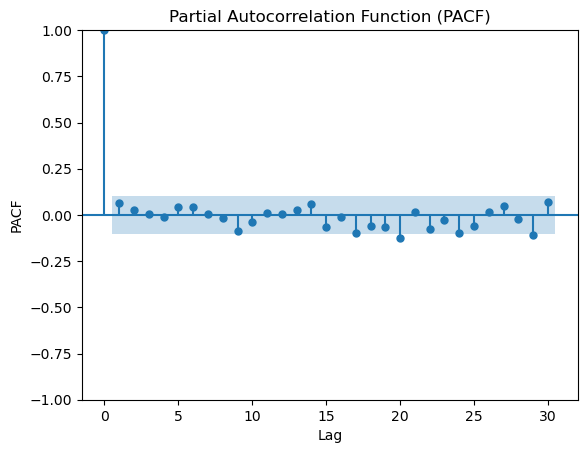

In [7]:
plot_pacf(ts, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()



In [8]:
# Fit ARIMA model
order = (2, 1, 2)  # Example order (p, d, q)
model = ARIMA(ts, order=order)
result = model.fit()



In [9]:
# Print model summary
print(result.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -520.836
Date:                Thu, 18 Apr 2024   AIC                           1051.671
Time:                        21:49:13   BIC                           1071.157
Sample:                    01-01-2022   HQIC                          1059.416
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9170      0.068    -13.521      0.000      -1.050      -0.784
ar.L2          0.0741      0.057      1.297      0.195      -0.038       0.186
ma.L1         -0.0142      4.683     -0.003      0.9

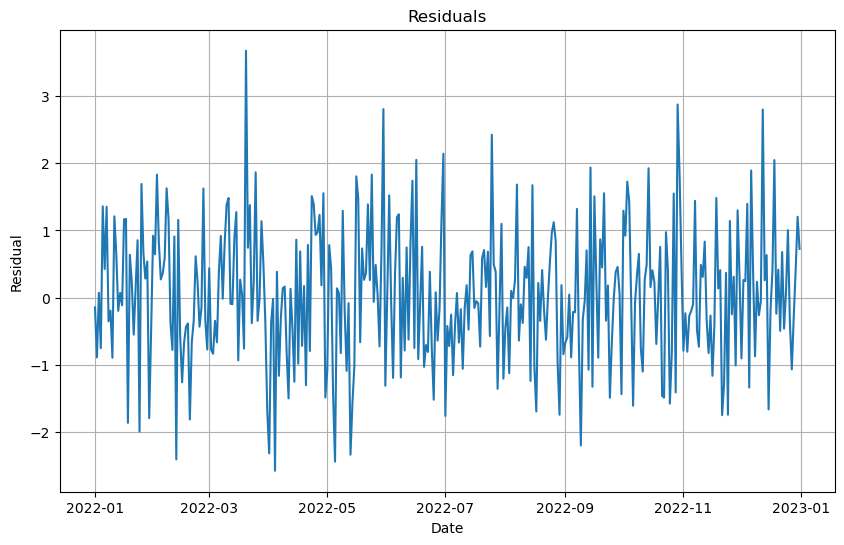

In [10]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(result.resid)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()



In [11]:
# Forecast future values
forecast_steps = 30  # Example forecast steps
forecast = result.forecast(steps=forecast_steps)



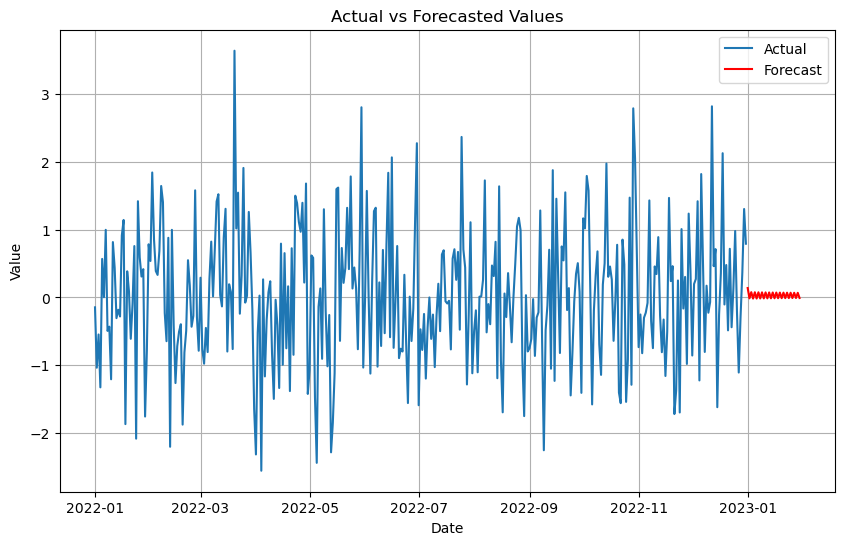

In [12]:
# Plot forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
